<a href="https://colab.research.google.com/github/AbdalrahmanAliElnashar/Regression-Projects/blob/main/02-Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Price Prediction
This dataset contains information about used cars. This data can be used for a lot of purposes such as price prediction.
The columns in the given dataset are as follows:
- name
- year
- selling_price
- km_driven
- fuel
- seller_type
- transmission
- Owner

In [ ]:
# Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, confusion_matrix, mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree


In [ ]:
# Access Data
data = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

### Data Exploration

In [ ]:
#  Data Exploration
print('Number of Rows: ', data.shape[0])
print('Number of Columns: ', data.shape[1], '\n')
print('Columns Names:', data.columns, '\n')
print('SubSet of Data:\n ', data.head().to_string(), '\n')
print('Data Information: '); print(data.info(), '\n')
print('Data Describe:\n ', data.describe(), '\n')

Number of Rows:  4340
Number of Columns:  8 

Columns Names: Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object') 

SubSet of Data:
                         name  year  selling_price  km_driven    fuel seller_type transmission         owner
0             Maruti 800 AC  2007          60000      70000  Petrol  Individual       Manual   First Owner
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol  Individual       Manual   First Owner
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel  Individual       Manual   First Owner
3    Datsun RediGO T Option  2017         250000      46000  Petrol  Individual       Manual   First Owner
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel  Individual       Manual  Second Owner 

Data Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column        

#### Check for duplicates

In [ ]:
# Check for duplicates
print(data.duplicated().any())
duplicated = data.duplicated()
print('Number of duplicated data: ', duplicated[duplicated == True].size)

True
Number of duplicated data:  763


## Categorical Features:


In [ ]:
print('Categorical Data: ')
print('Fuel unique values: ', data['fuel'].unique())
print('Number of unique values: ', data['fuel'].unique().size)
print('Seller type unique values: ', data['seller_type'].unique())
print('Number of unique values: ', data['seller_type'].unique().size)
print('Transmission unique values: ', data['transmission'].unique())
print('Number of unique values: ', data['transmission'].unique().size)
print('Owner unique values: ', data['owner'].unique())
print('Number of unique values: ', data['owner'].unique().size)

Categorical Data: 
Fuel unique values:  ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
Number of unique values:  5
Seller type unique values:  ['Individual' 'Dealer' 'Trustmark Dealer']
Number of unique values:  3
Transmission unique values:  ['Manual' 'Automatic']
Number of unique values:  2
Owner unique values:  ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']
Number of unique values:  5


In [ ]:
# Unique name cars
print('Unique name of Cars: ', data['name'].unique().size)

Unique name of Cars:  1491


In [ ]:
# name splitting
name = data['name'].str.split(' ', expand=True)
data['car_maker'] = name[0]
data['car_model'] = name[1]
print('Data After Splitting car Name')
print(data.head().to_string())

Data After Splitting car Name
                       name  year  selling_price  km_driven    fuel seller_type transmission         owner car_maker car_model
0             Maruti 800 AC  2007          60000      70000  Petrol  Individual       Manual   First Owner    Maruti       800
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol  Individual       Manual   First Owner    Maruti     Wagon
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel  Individual       Manual   First Owner   Hyundai     Verna
3    Datsun RediGO T Option  2017         250000      46000  Petrol  Individual       Manual   First Owner    Datsun    RediGO
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel  Individual       Manual  Second Owner     Honda     Amaze


## Explore Categorical Features

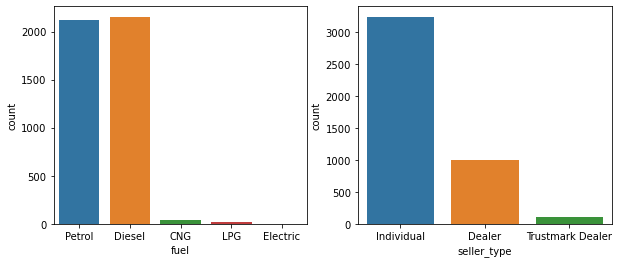

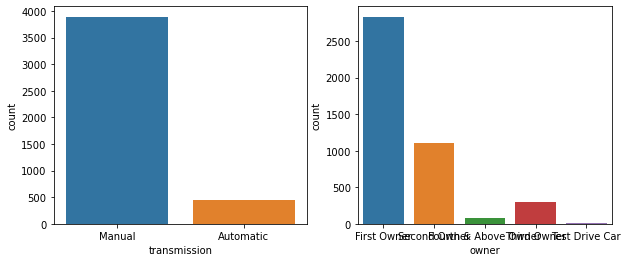

In [ ]:
# Figure to intercept categorical Features
cat_cols = ['fuel', 'seller_type', 'transmission', 'owner']
i = 0
while i < 4:
    fig = plt.figure(figsize=[10, 4])

    plt.subplot(1, 2, 1)
    sns.countplot(x=cat_cols[i], data=data)
    i += 1

    plt.subplot(1, 2, 2)
    sns.countplot(x=cat_cols[i], data=data)
    i += 1

    plt.show()

## Data Pre-Processing
Replacement 

In [ ]:
data['fuel'].replace(['Petrol', 'Diesel', 'LPG', 'CNG', 'Electric'], [1, 2, 3, 4, 5], inplace=True)
data['seller_type'].replace(['Individual', 'Dealer', 'Trustmark Dealer'], [1, 2, 3], inplace=True)
data['transmission'].replace(['Manual', 'Automatic'], [0, 1], inplace=True)
data['owner'].replace(['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner', 'Test Drive Car'],
                      [1, 2, 3, 4, 0], inplace=True)
data['year'] = 2020 - data['year']
print('**********************************************************************************')
print('Data Types after Replacement:\n ', data.dtypes)
print(data.head().to_string())

**********************************************************************************
Data Types after Replacement:
  name             object
year              int64
selling_price     int64
km_driven         int64
fuel              int64
seller_type       int64
transmission      int64
owner             int64
car_maker        object
car_model        object
dtype: object
                       name  year  selling_price  km_driven  fuel  seller_type  transmission  owner car_maker car_model
0             Maruti 800 AC    13          60000      70000     1            1             0      1    Maruti       800
1  Maruti Wagon R LXI Minor    13         135000      50000     1            1             0      1    Maruti     Wagon
2      Hyundai Verna 1.6 SX     8         600000     100000     2            1             0      1   Hyundai     Verna
3    Datsun RediGO T Option     3         250000      46000     1            1             0      1    Datsun    RediGO
4     Honda Amaze VX i-DTEC    

### Check correlation

Correlation
selling_price    1.000000
transmission     0.530205
seller_type      0.240666
fuel             0.220359
km_driven       -0.192289
owner           -0.228091
year            -0.413922
Name: selling_price, dtype: float64


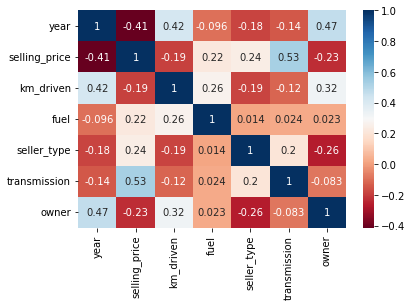

In [ ]:
# Check correlation
print('Correlation')
print(data.corr()['selling_price'].sort_values(ascending=False))
sns.heatmap(data.corr(), annot=True, cmap="RdBu")
plt.show()

###  
- Selling price and 'transmission' are highly correlated
- Selling price and 'year' are highly correlated
- 'km Driven' and selling price show a negative correlation
- 'owner' and selling price show a negative correlation

### Determine Features and Targt

In [ ]:
# x and y Determination
x = data.loc[:, ['year',  'fuel', 'seller_type', 'transmission', 'owner']]
y = data.loc[:, 'selling_price']

In [ ]:
# train & test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Linear Regression

In [ ]:
print('Linear Regression')
linReg = LinearRegression()
linReg.fit(x_train, y_train)
y_predict = linReg.predict(x_test)

# Mean square Error 
print('MSE: ', int(np.sqrt(mean_squared_error(y_test, y_predict))))

# R_score
r_score = r2_score(y_test, y_predict) * 100
print("linear Regression model accuracy(in %):",int(r_score), '%')

# intercept
print('Model intercept: ', linReg.intercept_)

# coefficient
print('Model coefficient: ', linReg.coef_)

# Ordainary least squar 'OLS'
model = sm.OLS(y_train, x_train).fit()
y_predict = model.predict(x_test)
print(model.summary())

Linear Regression
MSE:  439224
linear Regression model accuracy(in %): 48 %
Model intercept:  325089.1580699482
Model coefficient:  [-40454.6509014  183370.25005988  98389.56942217 851228.96380904
 -28109.98161847]
                                 OLS Regression Results                                
Dep. Variable:          selling_price   R-squared (uncentered):                   0.665
Model:                            OLS   Adj. R-squared (uncentered):              0.665
Method:                 Least Squares   F-statistic:                              1377.
Date:                Mon, 07 Mar 2022   Prob (F-statistic):                        0.00
Time:                        16:45:09   Log-Likelihood:                         -50029.
No. Observations:                3472   AIC:                                  1.001e+05
Df Residuals:                    3467   BIC:                                  1.001e+05
Df Model:                           5                                            

## Lasso Regression

In [ ]:
# Lasso Regression
print('Lasso Regression')
lassoReg = Lasso(alpha=5)
lassoModel = lassoReg.fit(x_train, y_train)
y_lassoPredict = lassoReg.predict(x_test)

# Mean square Error 
print('MSE', np.sqrt(mean_squared_error(y_test, y_lassoPredict)))

# R_score
r_scoreLasso = r2_score(y_test, y_lassoPredict) * 100
print("linear Regression model accuracy(in %):",int(r_scoreLasso), '%')

# intercept
print('Model intercept: ', lassoReg.intercept_)

# coefficient
print('Model coefficient: ', lassoReg.coef_)

# OlS
model = sm.OLS(y_train, x_train).fit()
y_predict = model.predict(x_test)
print(model.summary())

Lasso Regression
MSE 439225.99133095186
linear Regression model accuracy(in %): 48 %
Model intercept:  325130.0440599773
Model coefficient:  [-40456.43084566 183353.46958562  98378.52984275 851178.101557
 -28098.59960408]
                                 OLS Regression Results                                
Dep. Variable:          selling_price   R-squared (uncentered):                   0.665
Model:                            OLS   Adj. R-squared (uncentered):              0.665
Method:                 Least Squares   F-statistic:                              1377.
Date:                Mon, 07 Mar 2022   Prob (F-statistic):                        0.00
Time:                        16:48:18   Log-Likelihood:                         -50029.
No. Observations:                3472   AIC:                                  1.001e+05
Df Residuals:                    3467   BIC:                                  1.001e+05
Df Model:                           5                                     

## Ridge Regression

In [ ]:
print('Ridge Regression')
RidgeReg = Ridge(alpha=5)
RidgeModel = RidgeReg.fit(x_train, y_train)
y_RidgePredict = RidgeReg.predict(x_test)
print('MSE', np.sqrt(mean_squared_error(y_test, y_RidgePredict)))
r_scoreRidge = r2_score(y_test, y_RidgePredict) * 100
print("linear Regression model accuracy(in %):",
      int(r_scoreRidge), '%')
print('Model intercept: ', RidgeReg.intercept_)
print('Model coefficient: ', RidgeReg.coef_)
model = sm.OLS(y_train, x_train).fit()
y_predict = model.predict(x_test)
print(model.summary())

Ridge Regression
MSE 439660.8974876434
linear Regression model accuracy(in %): 47 %
Model intercept:  327222.23327414854
Model coefficient:  [-40585.94505095 182540.96143288  99348.12218559 837579.98359871
 -27952.65735256]
                                 OLS Regression Results                                
Dep. Variable:          selling_price   R-squared (uncentered):                   0.665
Model:                            OLS   Adj. R-squared (uncentered):              0.665
Method:                 Least Squares   F-statistic:                              1377.
Date:                Mon, 07 Mar 2022   Prob (F-statistic):                        0.00
Time:                        16:44:39   Log-Likelihood:                         -50029.
No. Observations:                3472   AIC:                                  1.001e+05
Df Residuals:                    3467   BIC:                                  1.001e+05
Df Model:                           5                                   

## Decision Tree 

Tree Decision
MSE:  124826166060
Tree Decision model accuracy (in %):  66 %


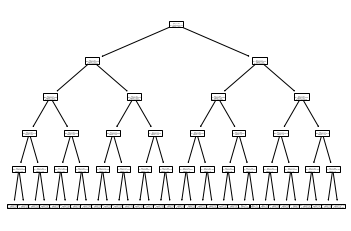

In [ ]:
print('Tree Decision')
decisionTree = DecisionTreeRegressor(max_depth=5,
                                     random_state=0,
                                     splitter='best')
model = decisionTree.fit(x_train, y_train)
y_predict = decisionTree.predict(x_test)
print('MSE: ', int(mean_squared_error(y_test, y_predict)))
r_score_tree = r2_score(y_test, y_predict)
print('Tree Decision model accuracy (in %): ', int(r_score_tree * 100), '%')
tree.plot_tree(model)
plt.show()